Import the libraries

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called.  The "matplotlib inline" is to display figures in this notebook itself 


import pandas as pd 
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp  # scientific computation library

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns  # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

Defining the dataset

(50,)


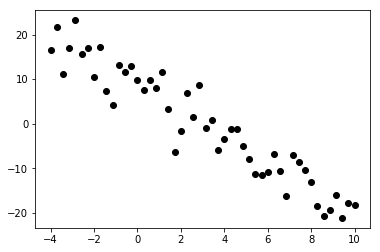

In [4]:
def f1(x, m, c): # y = m*x + c (ground truth function)
    return m*x + c 
xmin, xmax, npts = [-4, 10, 50]
X = np.linspace(xmin, xmax, npts) # defining domain of the function as a vector of 50 real numbers between 0 and 5
print(np.shape(X))
# Create data from ground truth function that is corrupted by additive Gaussian noise of mean 0 and std. dev. 4
y0 = f1(X, -3., 9.) + np.random.normal(0,scale=4, size=np.shape(X))  
plt.scatter(X, y0, marker='o', c='k')

Next step: The design matrix is formed by (1) assembling each input vector as a row and (2) adding a column of ones. In this case the input vector is a scalar. We will end up with a design matrix of size (2-times-N) where N is the number of data points. This sets up the linear equation  Aw=y .

In [8]:
def designmat1(Xmat):
    X = np.atleast_2d(Xmat).T
    col1 = np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1)
    X = np.concatenate((col1, X), axis=1) 
    return X

designmat1(X).shape

(50, 2)

### Find optimal weights by gradient descent

Find the weight vector  w  by minimising the length of the residual vector  r(w):=y−Aw  by gradient descent. From the lecture slides/tutorial exercises you should be able to verify that the function "gradsqloss" corresponds to the gradient of the average of squared residuals loss function.

In [ ]:
def gradsqloss(Amat, y, wt):
    n, p = Amat.shape
    return (-2/n)*Amat.T.dot((y - Amat.wt))